In [27]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    'churn.csv',
)
df.head(10)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


1. Построить гистограмму количества звонков в техническую поддержку

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_customer_service_calls', ylabel='Density'>

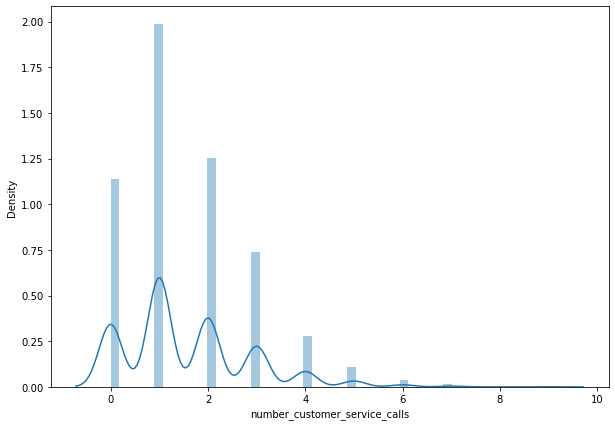

In [28]:
sns.distplot(df["number_customer_service_calls"])

2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

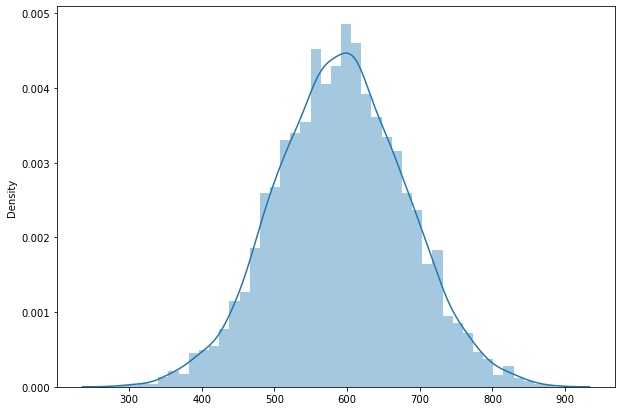

In [37]:
sns.distplot(df[['total_night_minutes','total_intl_minutes','total_day_minutes','total_eve_minutes']].sum(axis=1))


3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции 
(https://ru.wikipedia.org/wiki/Корреляция) 
общего количества минут и количества звонков в техподдержку

In [189]:
import math
import numpy as np
total_minutes_df = df[['total_night_minutes','total_intl_minutes','total_day_minutes','total_eve_minutes']].sum(axis=1)
total_calls_df = df["number_customer_service_calls"]

deviation_minutes = total_minutes_df.map(lambda x: x-total_minutes_df.mean())
deviation_calls = total_calls_df.map(lambda x: x-total_calls_df.mean())

cov=0;
for i in range(total_minutes_df.size):
    cov = cov + deviation_minutes[i]*deviation_calls[i]
sigma = math.sqrt(np.square(deviation_minutes).sum()*np.square(deviation_calls).sum())    

# sigma

correlation_coeff = cov/sigma
print("Linear correlation coefficient: ",correlation_coeff)
# math.sqrt(4)

Linear correlation coefficient:  -0.011407910827441357


In [89]:
import scipy as sp
from scipy.stats import norm
print('Linear correlation coefficient (using scipy lib): ',sp.stats.pearsonr(total_minutes_df, total_calls_df))

Linear correlation coefficient (using scipy lib):  (-0.011407910827441393, 0.4199628716756915)


4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, 
подкрасив точки в зависимости от оттока абонента


Text(0, 0.5, 'total minutes')

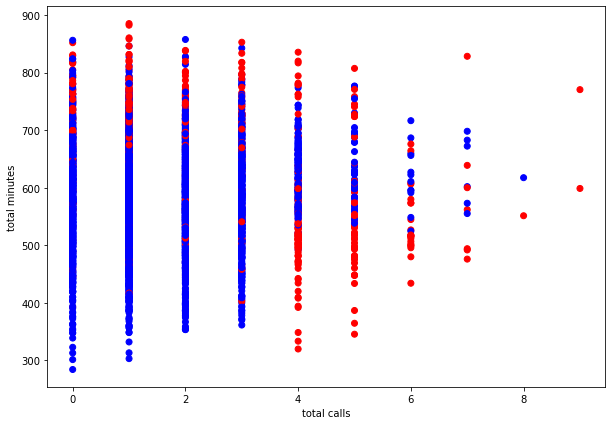

In [162]:
extended = df
extended['total_minutes'] = total_minutes_df
extended['total_calls'] = total_calls_df

def churned_to_color(churned):
    if(churned == True):
        return 'r'
    else:
        return 'b'

colors = list(map(churned_to_color,extended['churned']))

plt.scatter(extended['total_calls'],extended['total_minutes'],c=colors)
plt.xlabel("total calls")
plt.ylabel("total minutes")
# colors

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [142]:
df1 = extended[['phone_number','total_minutes']].groupby(by="phone_number").sum().sort_values(by = "total_minutes" ,ascending=False)

In [143]:
print("top-5 самых много говорящих клиентов:\n ",df1.head(5))
print("\ntop-5 самых мало говорящих клиентов:\n ",df1.tail(5))

top-5 самых много говорящих клиентов:
                total_minutes
phone_number               
345-9140              885.0
352-6976              882.2
345-3787              860.2
410-3888              858.2
370-4667              857.4

top-5 самых мало говорящих клиентов:
                total_minutes
phone_number               
375-8934              313.3
405-9233              313.0
362-8044              303.2
380-5246              301.5
331-3174              284.3


6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [204]:
extended['temporary']=1
df2 = extended.groupby(by="state").sum()
df2
df2["avg_day_charge_per_minute"] = df2["total_day_minutes"]/df2["total_day_charge"]
df2["churn_rate"] = df2["churned"]/df2["temporary"]
df2[["avg_day_charge_per_minute", "churn_rate"]]

,avg_day_charge_per_minute,churn_rate
state,,
AK,5.882273,0.069444
AL,5.882303,0.104839
AR,5.882261,0.173913
AZ,5.882241,0.101124
CA,5.882257,0.269231
CO,5.882241,0.114583
CT,5.882287,0.161616
DC,5.882150,0.102273
DE,5.882227,0.159574


7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [236]:
pd.get_dummies(df['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [369]:
df4=df
df4=df4.drop (columns = ['phone_number', 'area_code','international_plan','voice_mail_plan','temporary','total_calls','total_minutes','total_intl_charge',
                        'total_night_charge','total_eve_charge','total_day_charge','number_vmail_messages',])

df4 = pd.get_dummies(df4, ['state'])

X = df4[['account_length', 'total_day_minutes', 'total_eve_minutes',
             'total_night_minutes', 'total_intl_minutes', 'total_intl_minutes', 'total_intl_calls',
            'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY']]
y = df4['churned']

# Разделяем данные на данные для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,account_length,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_minutes,total_intl_calls,state_AK,state_AL,state_AR,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
4693,109,123.0,237.2,258.8,9.3,9.3,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610,91,231.8,150.6,269.2,11.6,11.6,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1540,117,102.3,135.2,199.7,15.7,15.7,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2356,105,273.8,289.7,269.1,5.8,5.8,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3378,70,169.1,219.8,193.5,10.7,10.7,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [370]:
df4.columns

Index(['account_length', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'churned', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY'],
      dtype='object')

9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas.

In [371]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [374]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)
classifier.fit(X_train, y_train)
predicted_y = classifier.predict(X_test)
print('Accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy: 0.87


In [375]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy: 0.86
